In [17]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

In [20]:
df = pd.read_csv(r"C:\Users\Abhiraj Mandal\OneDrive\Desktop\Stock_Prediction\Stock-Price-Prediction\SBIN.csv")

In [21]:
df.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
5531,14-11-2017,330.350006,334.700012,327.500000,329.100006,314.958130,25647162.0
3915,02-05-2011,281.000000,281.899994,268.200012,269.269989,233.242859,20646010.0
521,30-12-1997,22.899250,23.012472,22.408621,22.644501,15.309482,48851067.0
311,11-03-1997,28.786819,29.296322,27.664030,28.069744,18.742434,160153854.0
2488,20-07-2005,68.669449,69.320473,68.141075,68.391106,55.026981,16221358.0


In [5]:
df.shape

(7074, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7074 entries, 0 to 7073
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7074 non-null   object 
 1   Open       7065 non-null   float64
 2   High       7065 non-null   float64
 3   Low        7065 non-null   float64
 4   Close      7065 non-null   float64
 5   Adj Close  7065 non-null   float64
 6   Volume     7065 non-null   float64
dtypes: float64(6), object(1)
memory usage: 387.0+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7065.000000,7065.000000,7065.000000,7065.000000,7065.000000,7.065000e+03
mean,180.682841,183.085167,177.998209,180.448294,166.021712,3.130217e+07
std,154.773229,156.345078,152.980516,154.630549,152.903249,3.462744e+07
min,13.478195,13.935802,13.214009,13.346102,9.531410,0.000000e+00
25%,28.423565,28.824560,28.022570,28.456589,19.854374,1.299123e+07
50%,173.100006,176.500000,170.250000,172.925003,152.411270,2.064292e+07
75%,265.500000,268.899994,261.299988,265.174988,245.764954,3.651478e+07
max,703.650024,728.349976,694.200012,725.250000,725.250000,4.469483e+08


In [8]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,18.691147,18.978922,18.540184,18.823240,12.409931,43733533.0
1,1996-01-02,18.894005,18.964767,17.738192,18.224106,12.014931,56167280.0
2,1996-01-03,18.327892,18.568489,17.643839,17.738192,11.694577,68296318.0
3,1996-01-04,17.502312,17.832542,17.223972,17.676863,11.654142,86073880.0
4,1996-01-05,17.738192,17.785366,17.459852,17.577793,11.588827,76613039.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7074 entries, 0 to 7073
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       7074 non-null   datetime64[ns]
 1   Open       7065 non-null   float64       
 2   High       7065 non-null   float64       
 3   Low        7065 non-null   float64       
 4   Close      7065 non-null   float64       
 5   Adj Close  7065 non-null   float64       
 6   Volume     7065 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 387.0 KB


### EDA

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Function to create scatter plots
def create_scatter_plot(x_data, y_data, size_data=None, title=None, x_label=None, y_label=None, figsize=(20,10)):
    plt.figure(figsize=figsize)
    sns.scatterplot(x=x_data, y=y_data, size=size_data)
    if title:
        plt.title(title)
    if x_label:
        plt.xlabel(x_label)
    if y_label:
        plt.ylabel(y_label)
    plt.show()

In [13]:
# Function to create line plots
def create_line_plot(x_data, y_data, title=None, x_label=None, y_label=None, figsize=(20,10)):
    plt.figure(figsize=figsize)
    sns.lineplot(x=x_data, y=y_data)
    if title:
        plt.title(title)
    if x_label:
        plt.xlabel(x_label)
    if y_label:
        plt.ylabel(y_label)
    plt.show()

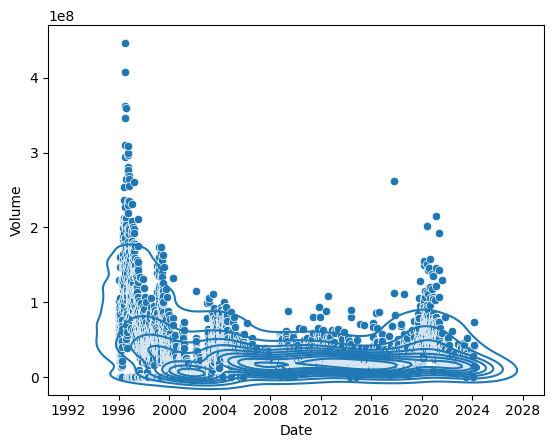

In [14]:
sns.scatterplot(x = df['Date'], y = df['Volume'])
sns.kdeplot(x = df['Date'], y = df['Volume'])
plt.show()

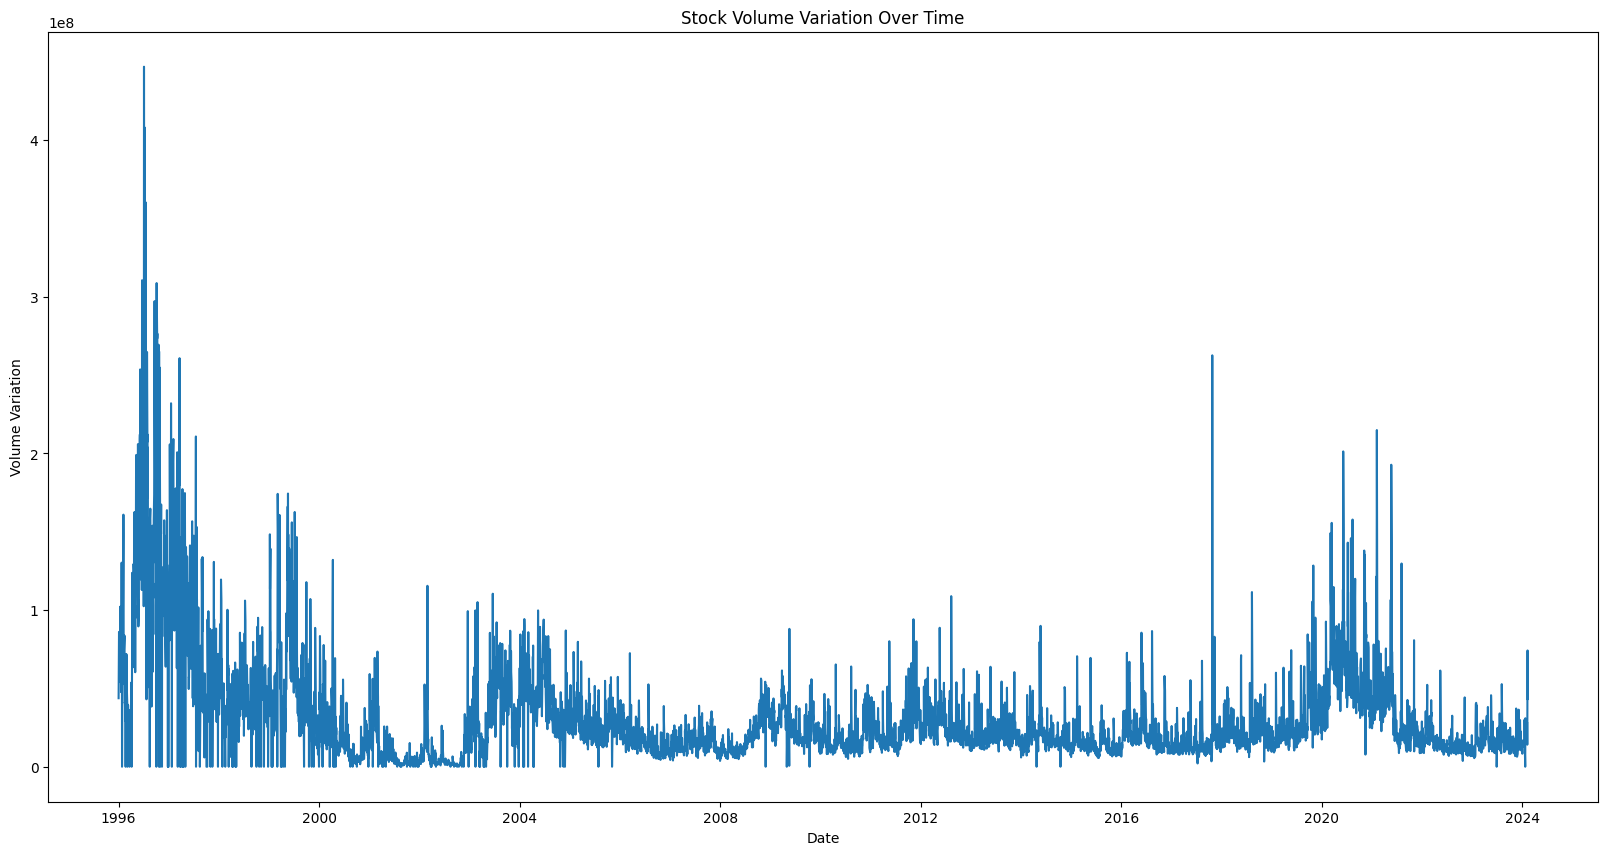

In [15]:
create_line_plot(df['Date'], df['Volume'], title="Stock Volume Variation Over Time",x_label='Date',y_label='Volume Variation')

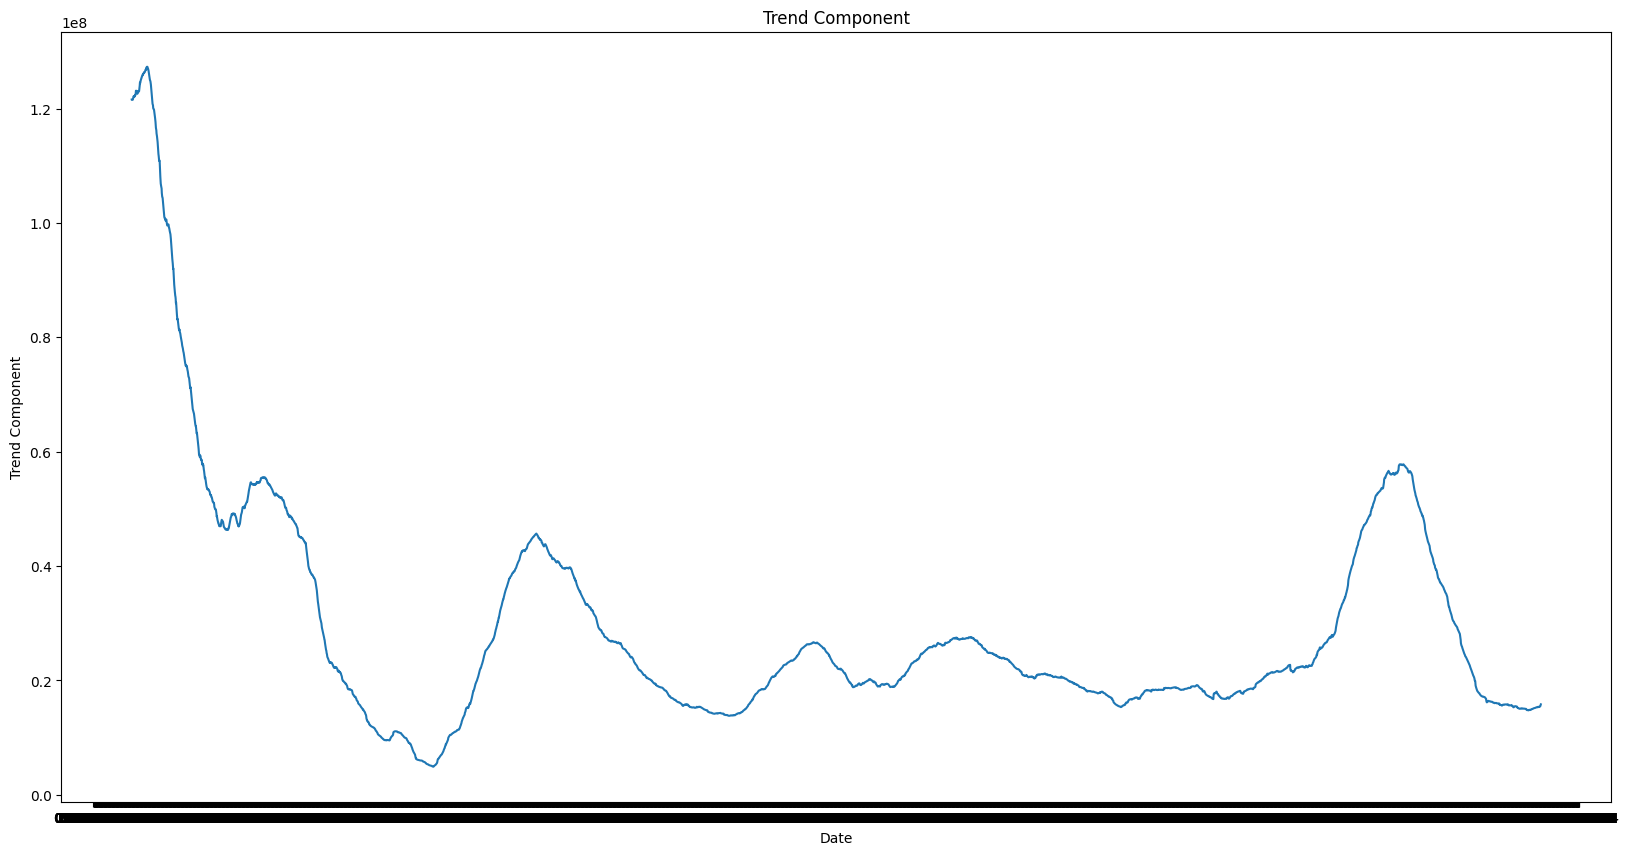

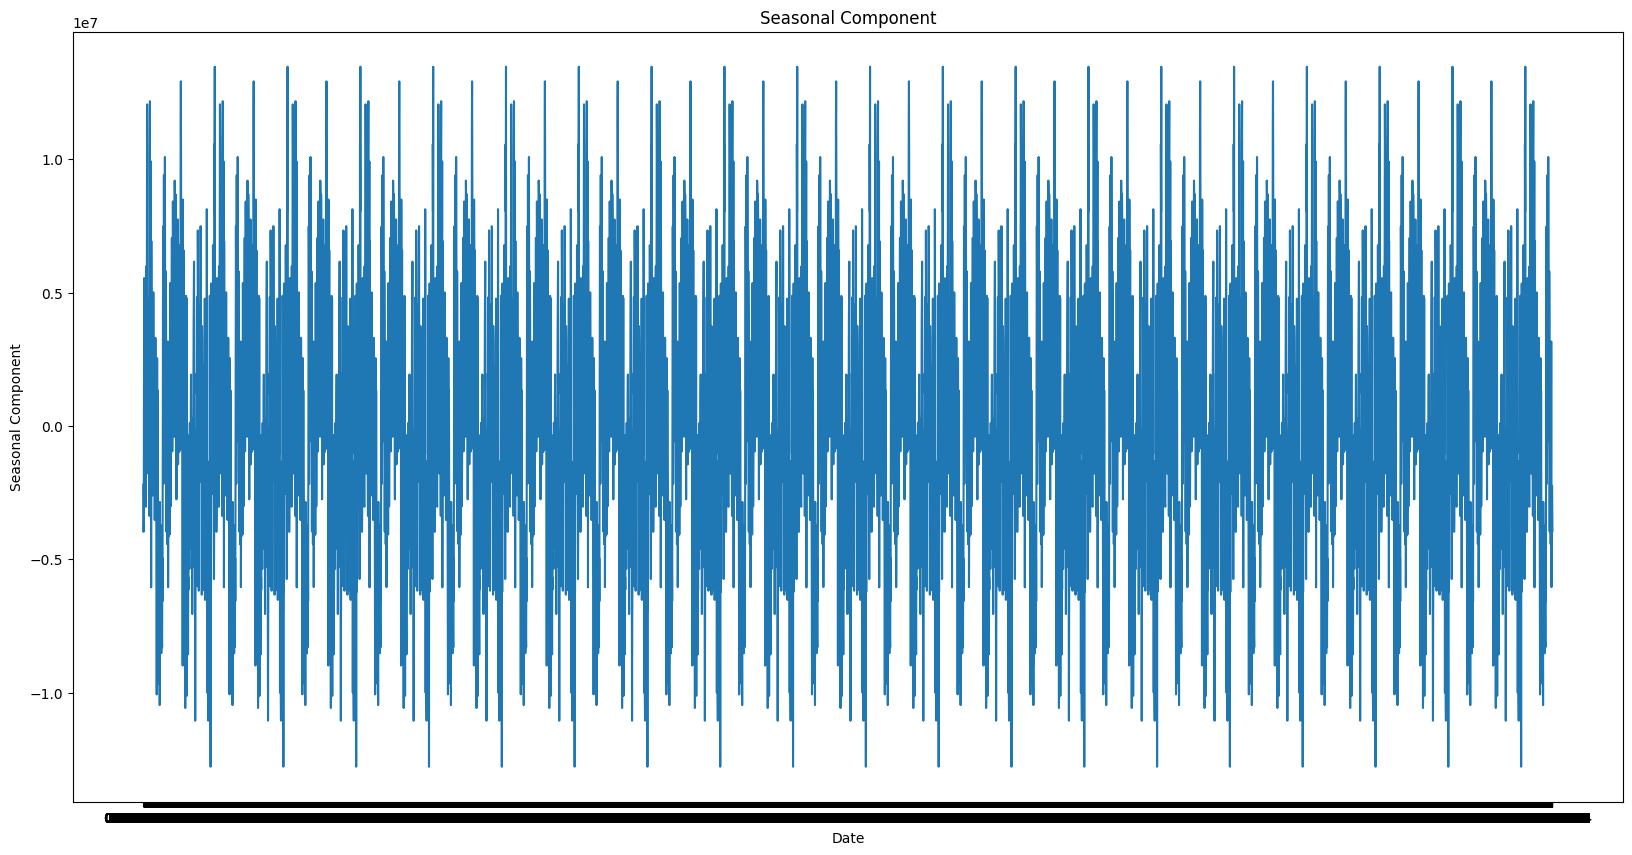

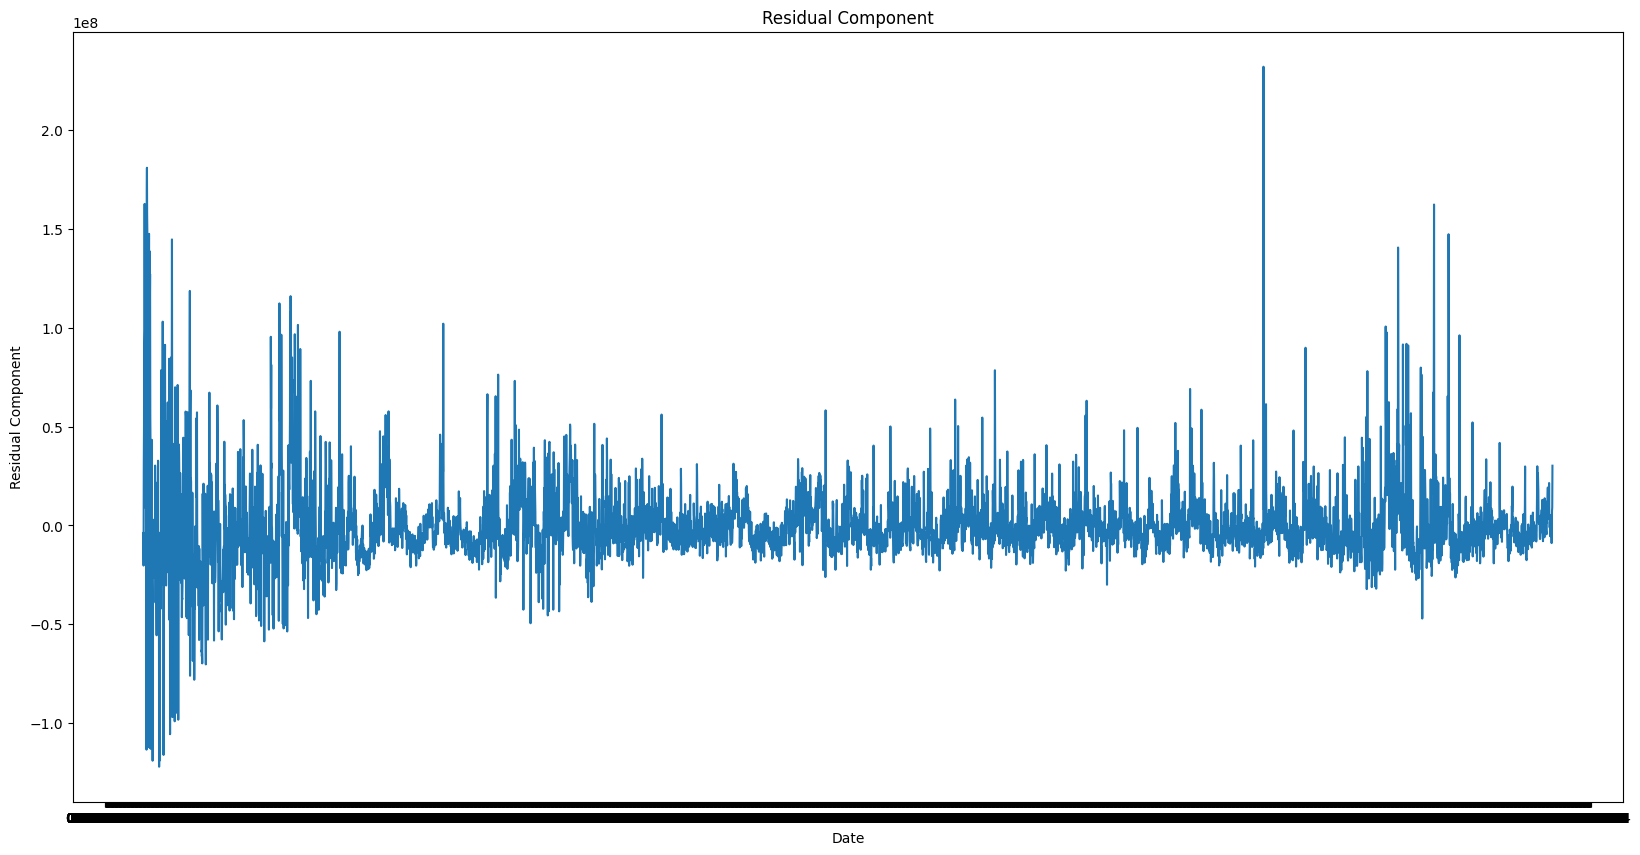

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_cleaned = df.dropna()
decomposition = seasonal_decompose(df_cleaned['Volume'], model='additive', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

create_line_plot(df_cleaned['Date'], trend, title='Trend Component', x_label='Date', y_label='Trend Component')

create_line_plot(df_cleaned['Date'], seasonal, title='Seasonal Component', x_label='Date', y_label='Seasonal Component')

create_line_plot(df_cleaned['Date'], residual, title='Residual Component', x_label='Date', y_label='Residual Component')

Early 1990s spike: There is a high trading volume around the mid-1990s, peaking at over 4 × 10^8 (400 million trades).
Post-1996 to 2020: The volume significantly decreases,especially in the year 2008 when the stock market crashed showing lower levels of activity with some fluctuations and minor peaks, particularly after 2016.


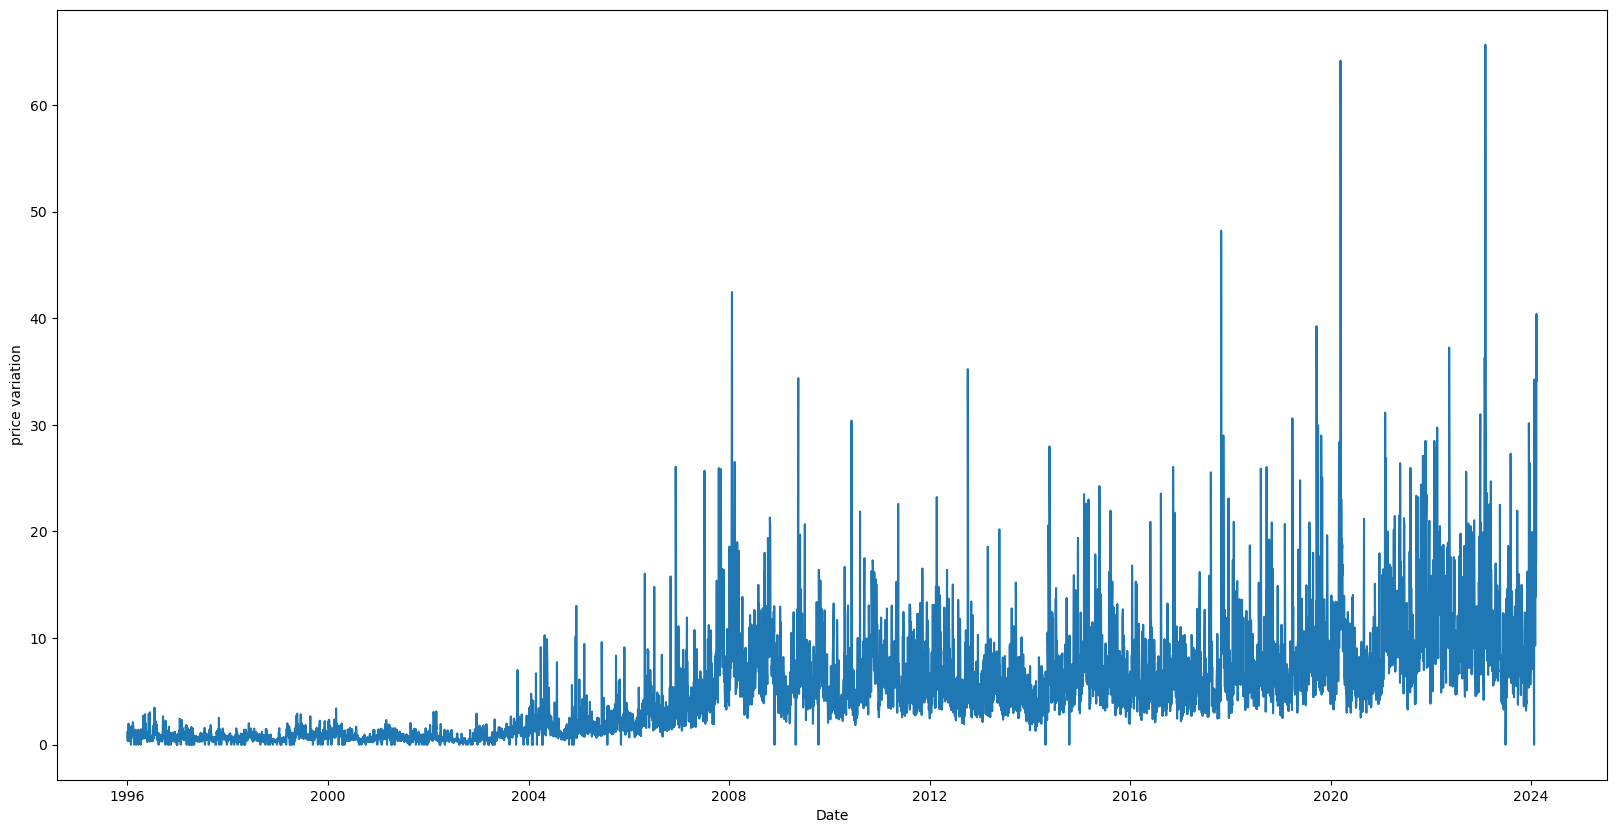

In [29]:
create_line_plot(df['Date'], df['High'] - df['Low'], 
                 title='Price Variation Over Time', x_label='Date', y_label='Price Variation')

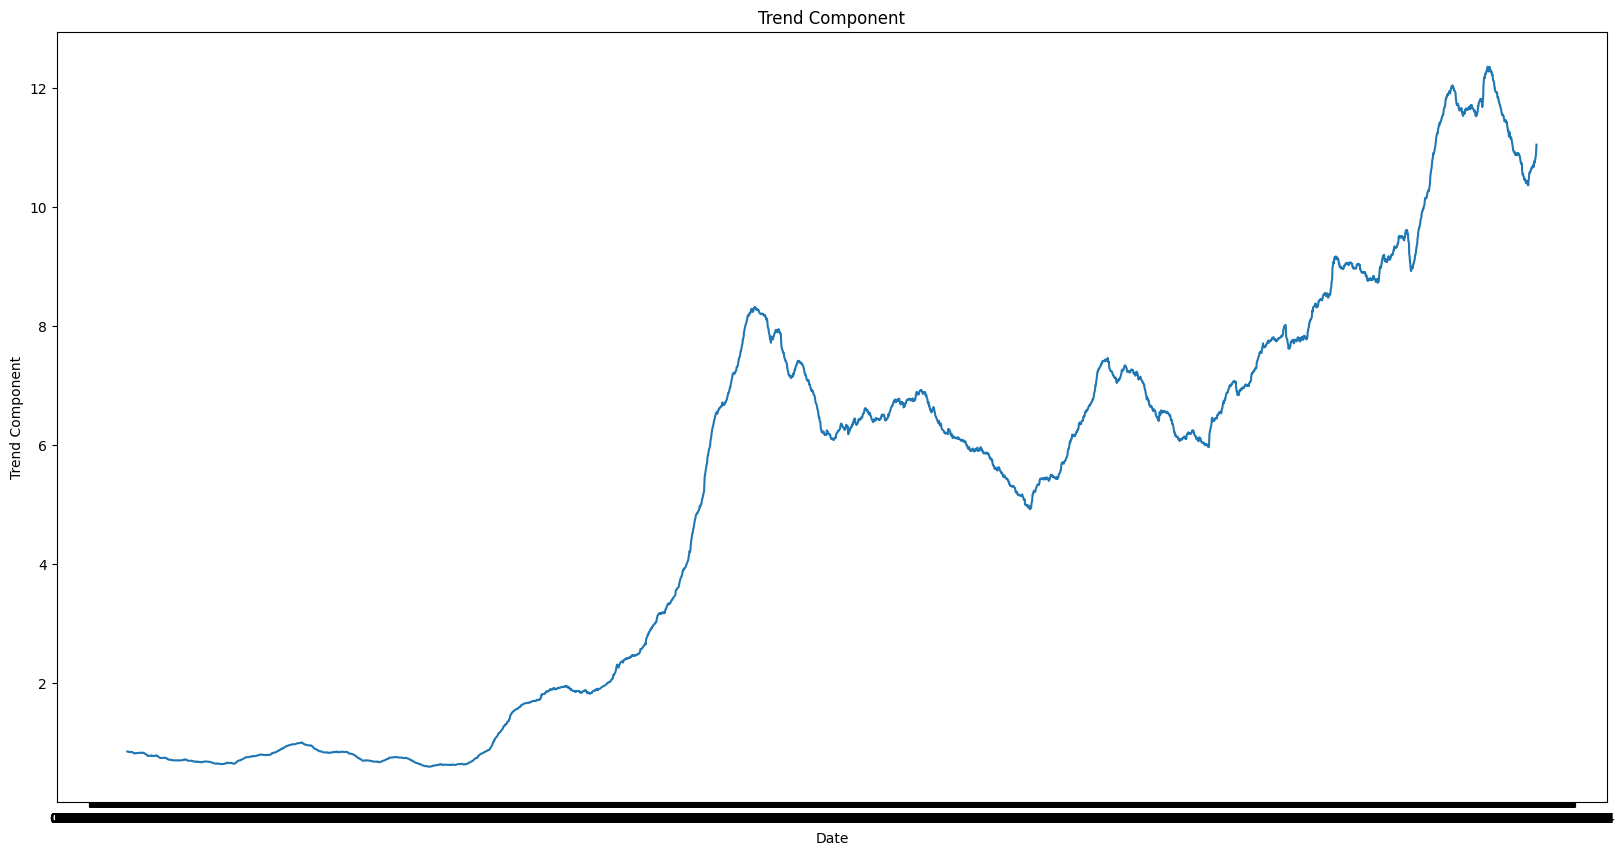

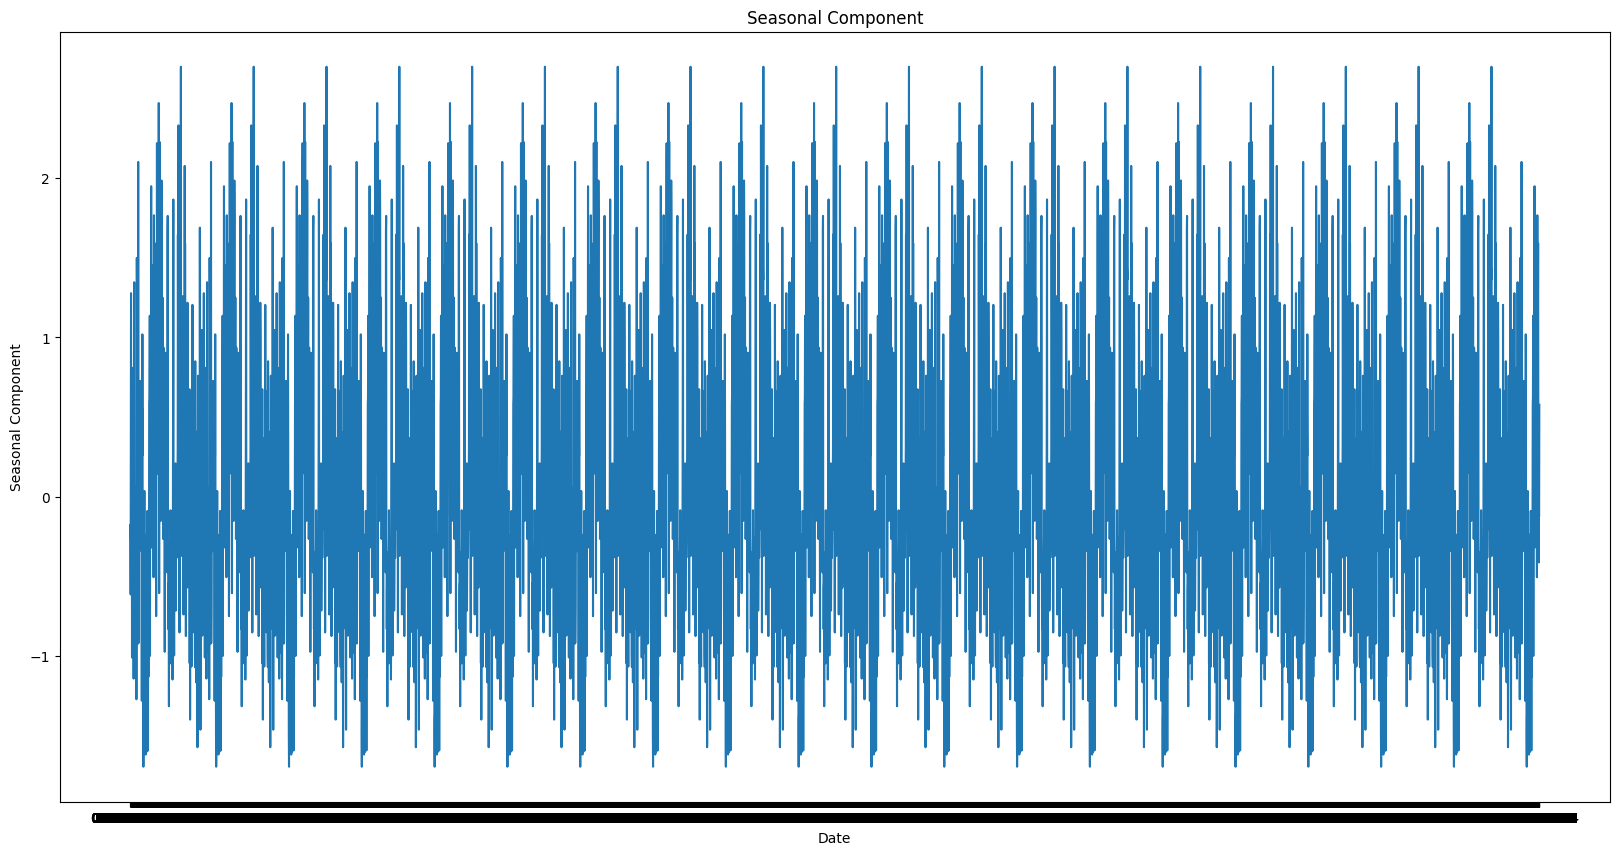

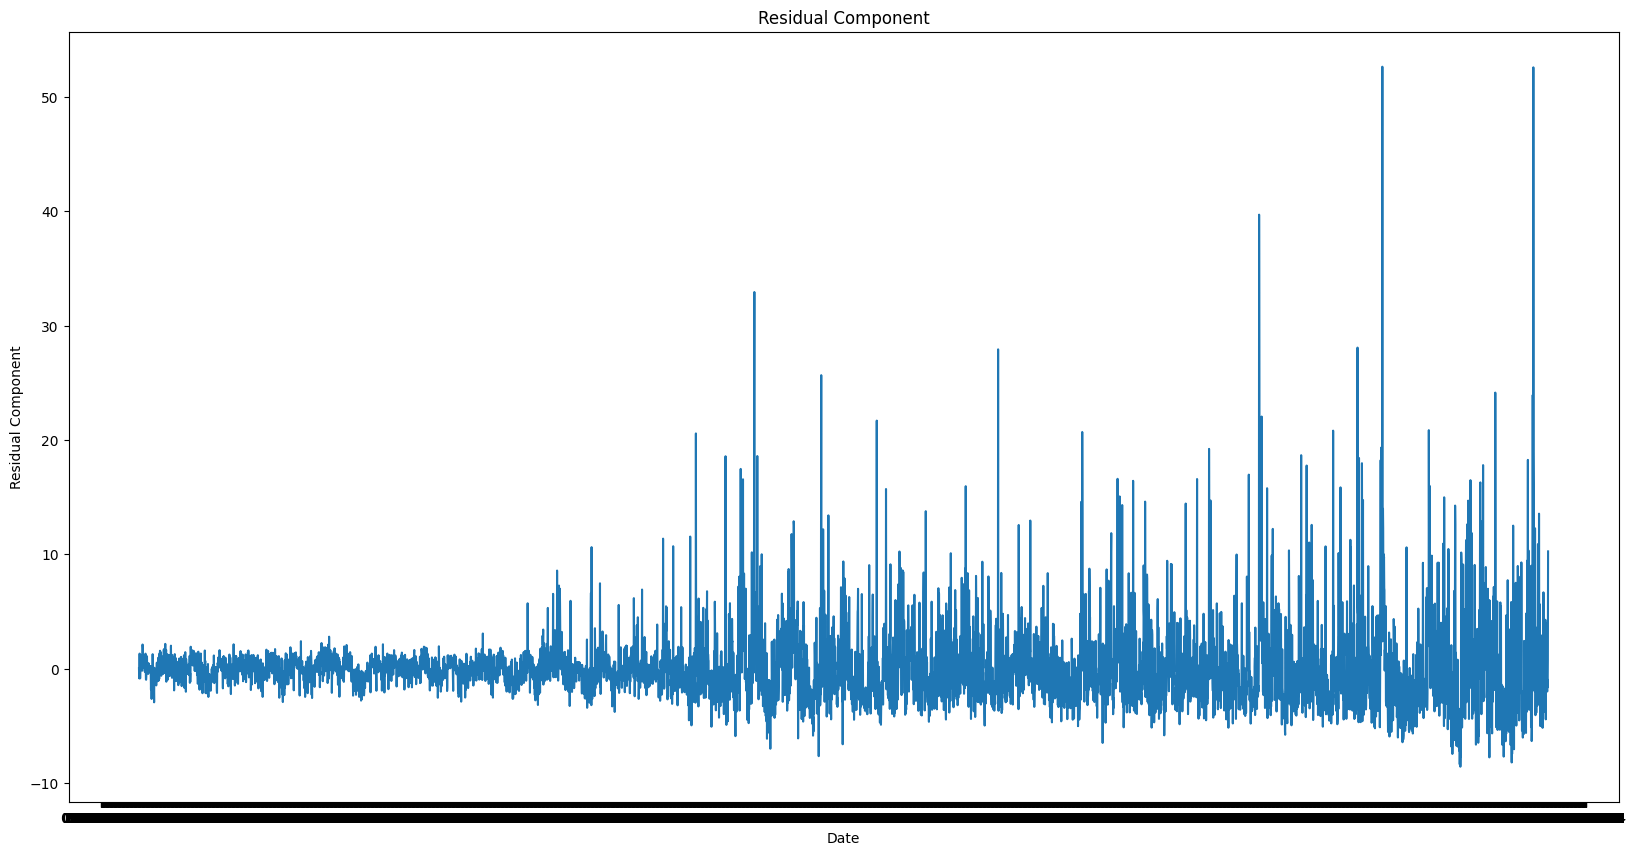

In [26]:
decomposition = seasonal_decompose(df_cleaned['High']-df_cleaned['Low'], model='additive', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

create_line_plot(df_cleaned['Date'], trend, title='Trend Component', x_label='Date', y_label='Trend Component')

create_line_plot(df_cleaned['Date'], seasonal, title='Seasonal Component', x_label='Date', y_label='Seasonal Component')

create_line_plot(df_cleaned['Date'], residual, title='Residual Component', x_label='Date', y_label='Residual Component')

#### Stable period until 2004: 
The price variation was relatively low and stable until around 2003-2004, generally staying under 10 units.
#### 2004-2008 increase: 
Starting from 2004, price variations gradually began to increase, peaking sharply just before the 2008 financial crisis. Some spikes went beyond 40 units.
#### 2008-2020 fluctuations:
After the 2008 peak, price variation showed continuous fluctuations with noticeable peaks, though they were more frequent post-2016.
#### 2020 onward:
The recent period (2020-2024) shows significant and frequent fluctuations, with peaks reaching 60+ units, possibly influenced by events like the COVID-19 pandemic and other global factors.

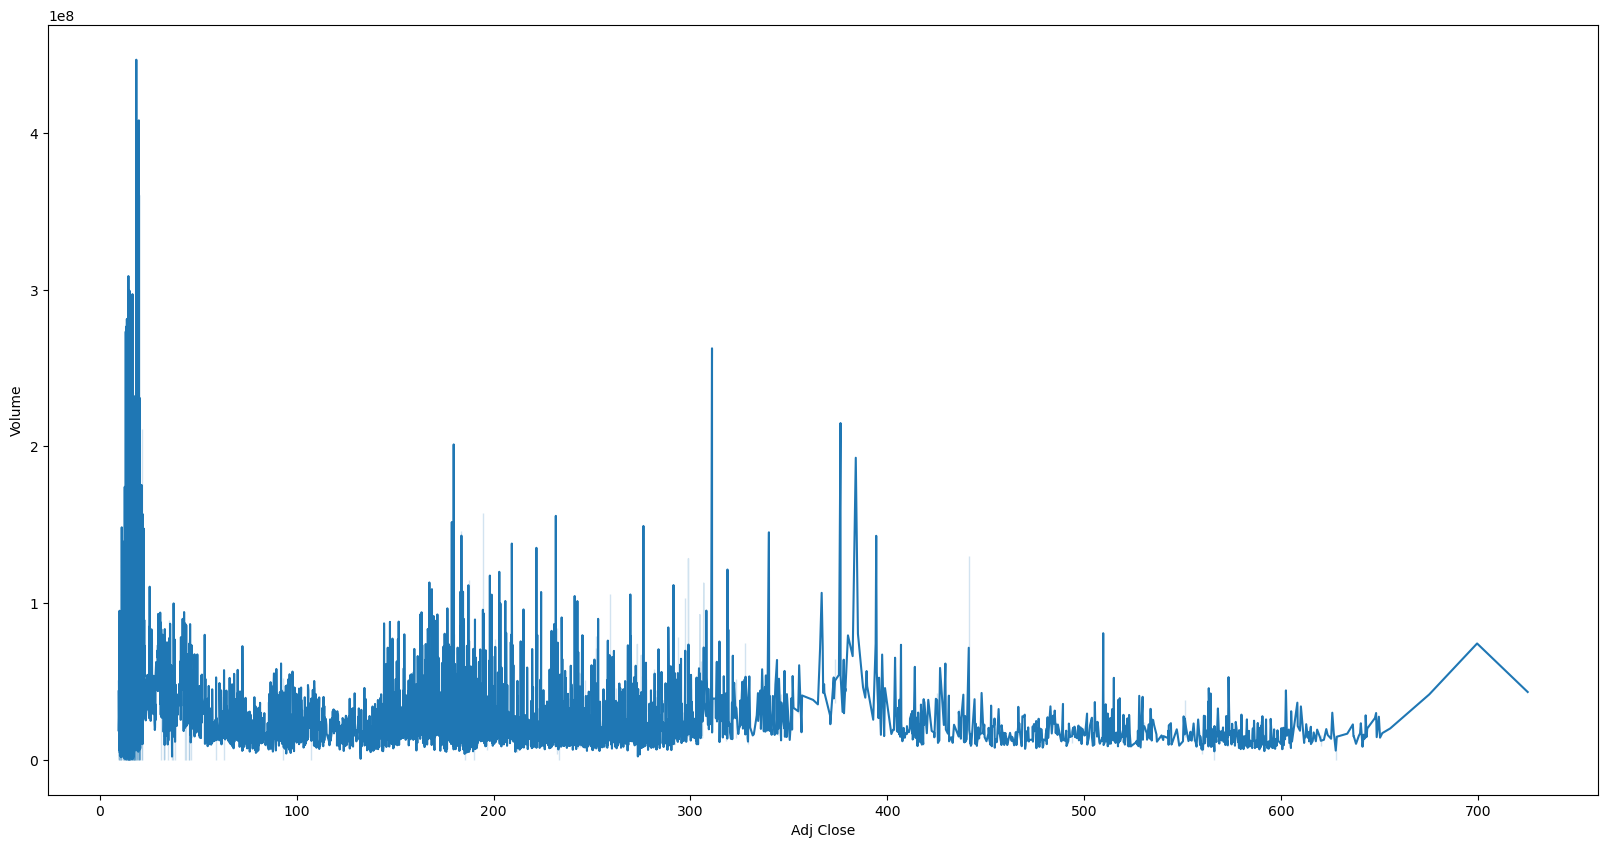

In [35]:
create_line_plot(df['Adj Close'], df['Volume'], 
                 title='Adjusted Close vs Volume', 
                 x_label='Adjusted Close', 
                 y_label='Volume')

The overall trend seems to be somewhat volatile, with periods of upward and downward movement.

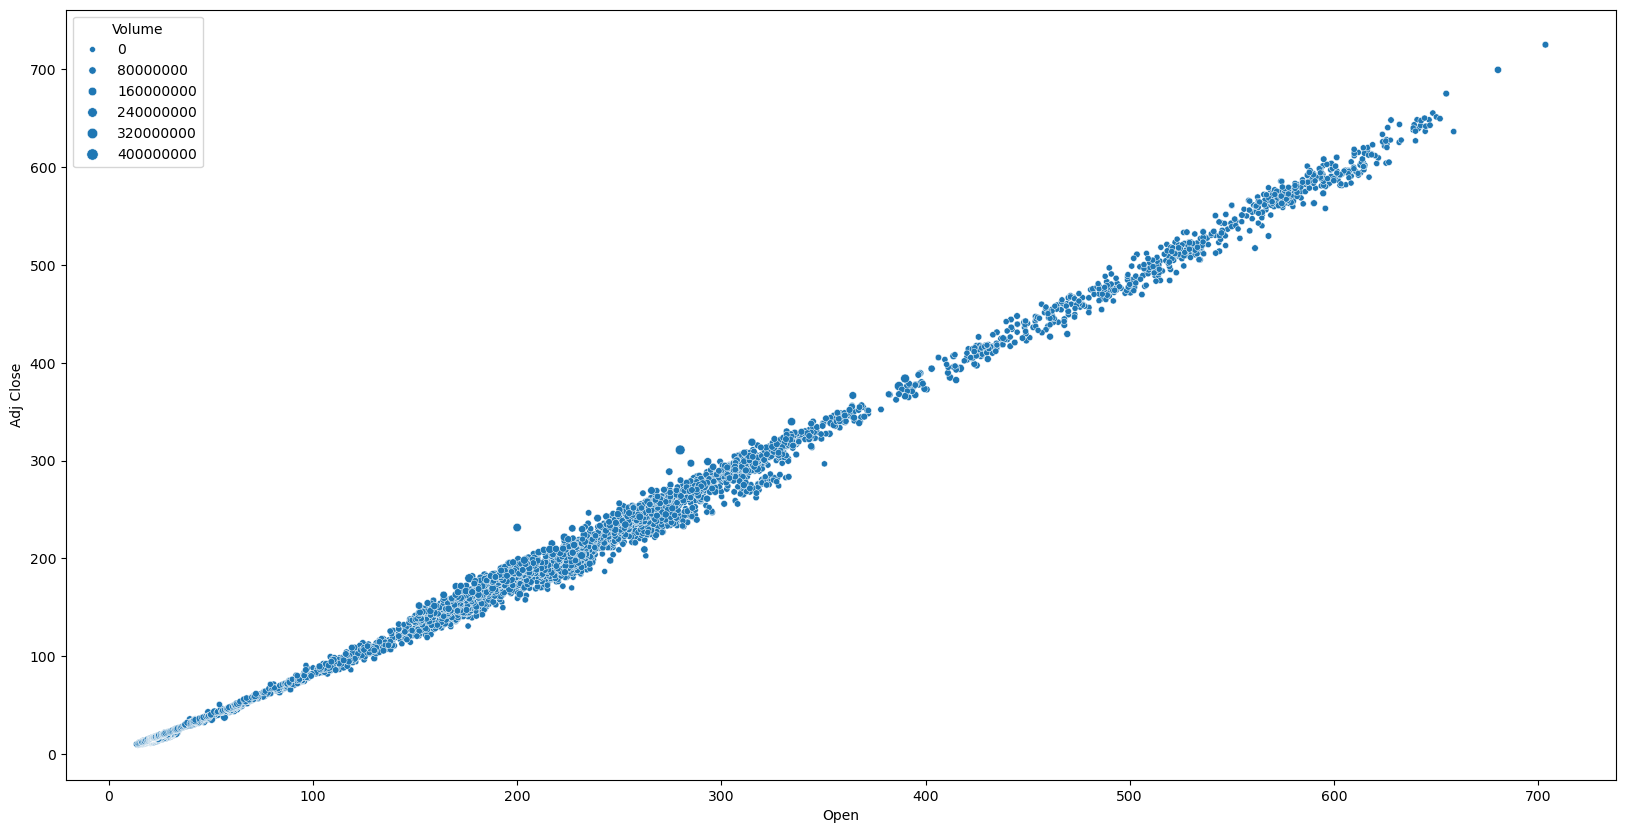

In [37]:
create_scatter_plot(df['Open'], df['Adj Close'], size_data=df['Volume'], 
                    title='Open vs Adjusted Close', x_label='Open', y_label='Adj Close')

The scatter points generally show an upward trend, indicating a positive correlation between the opening and closing prices. This means that, in general, when the stock opens higher, it tends to close higher as well.

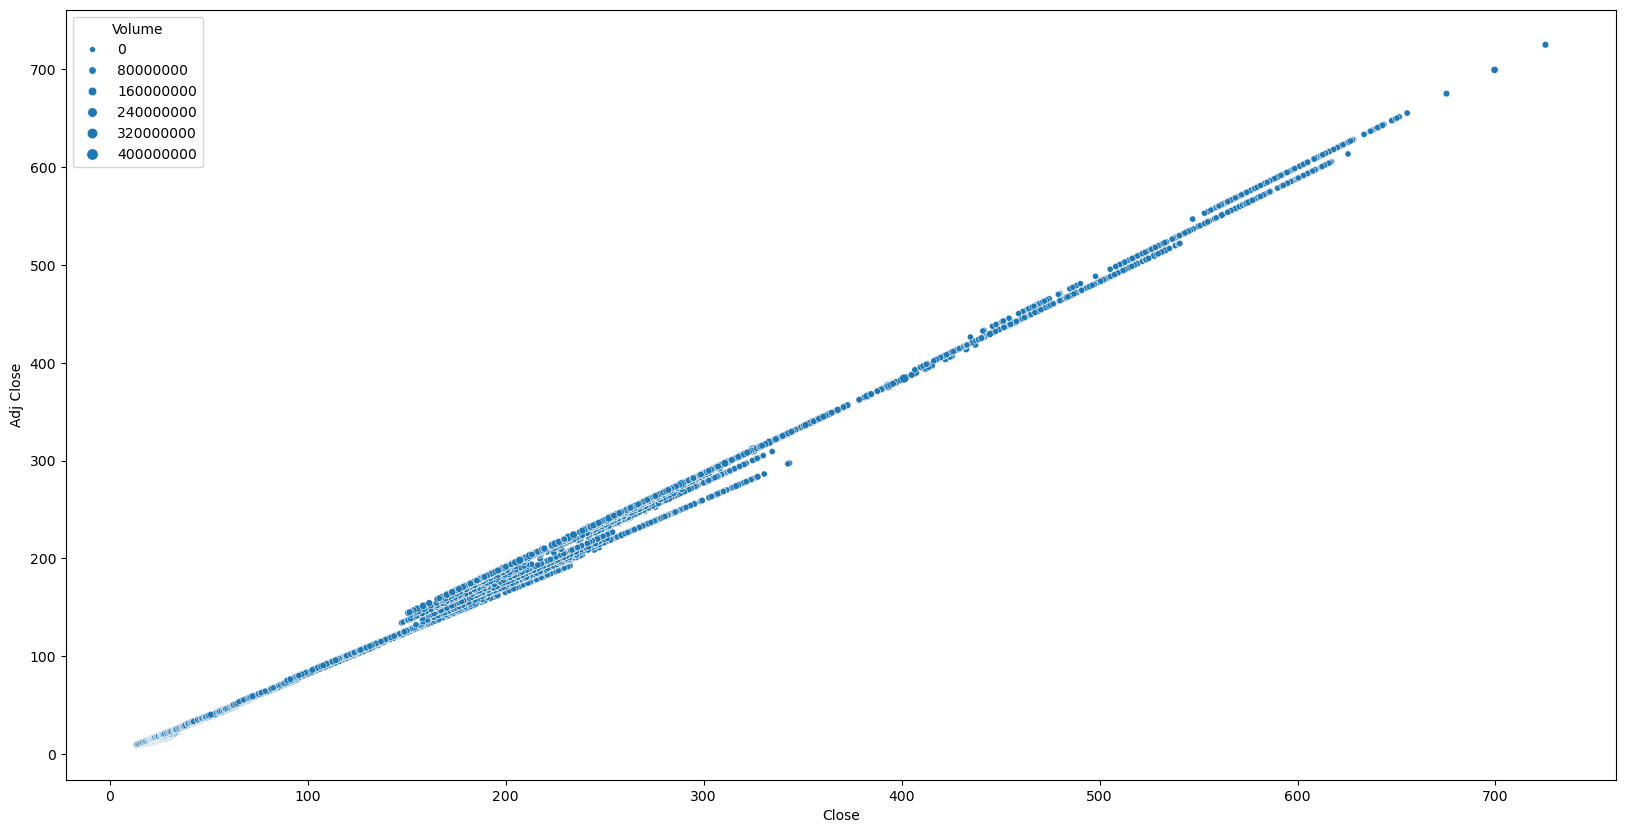

In [39]:
create_scatter_plot(df['Close'], df['Adj Close'], size_data=df['Volume'], 
                    title='Close vs Adjusted Close', x_label='Close', y_label='Adj Close')

The scatter points show a very strong upward trend, indicating a strong positive correlation between the closing price and the adjusted closing price. This means that, in general, when the stock closes higher, the adjusted closing price is also higher.

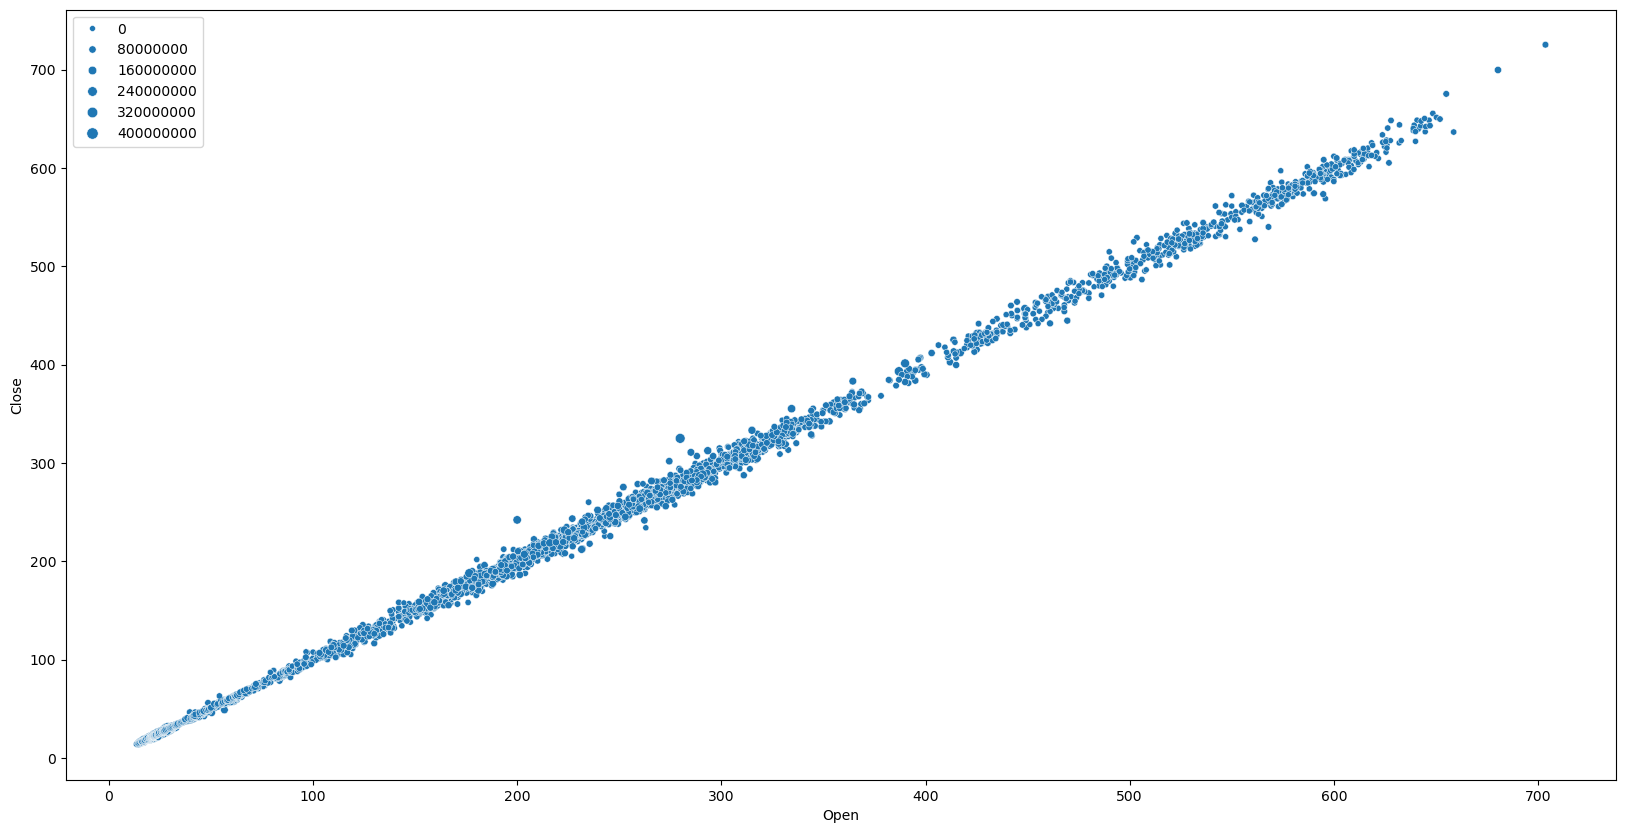

In [53]:
create_scatter_plot(df['Open'], df['Close'], size_data=df['Volume'], 
                    title='Open vs Close', x_label='Open', y_label='Close')

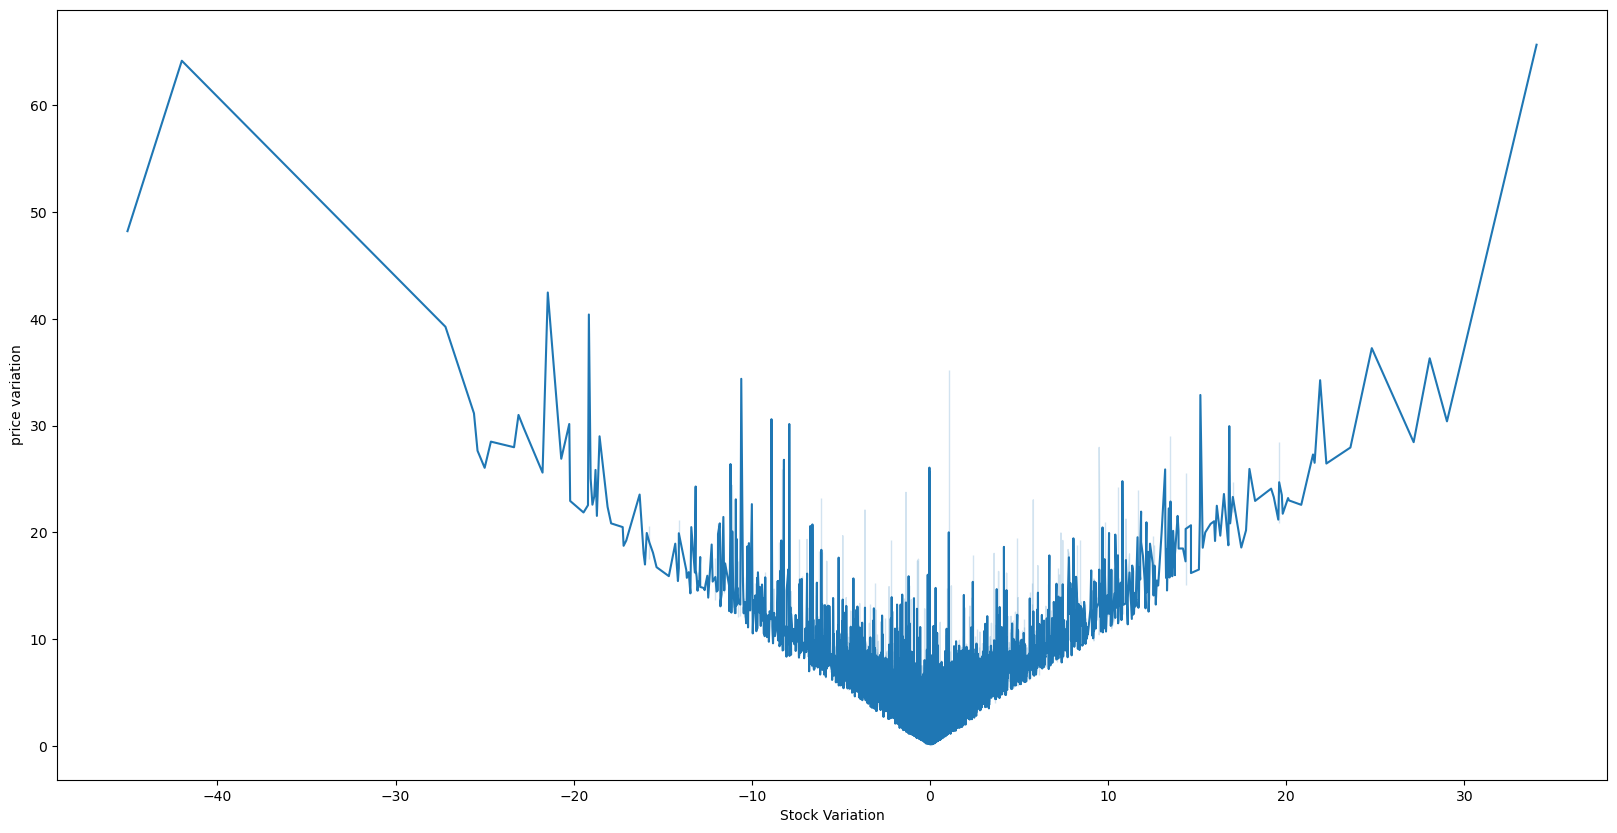

In [68]:
create_line_plot(df['Open'] - df['Close'], df['High'] - df['Low'], 
                 title='Stock Variation vs Price Variation', 
                 x_label='Stock Variation (Open - Close)', 
                 y_label='Price Variation (High - Low)')

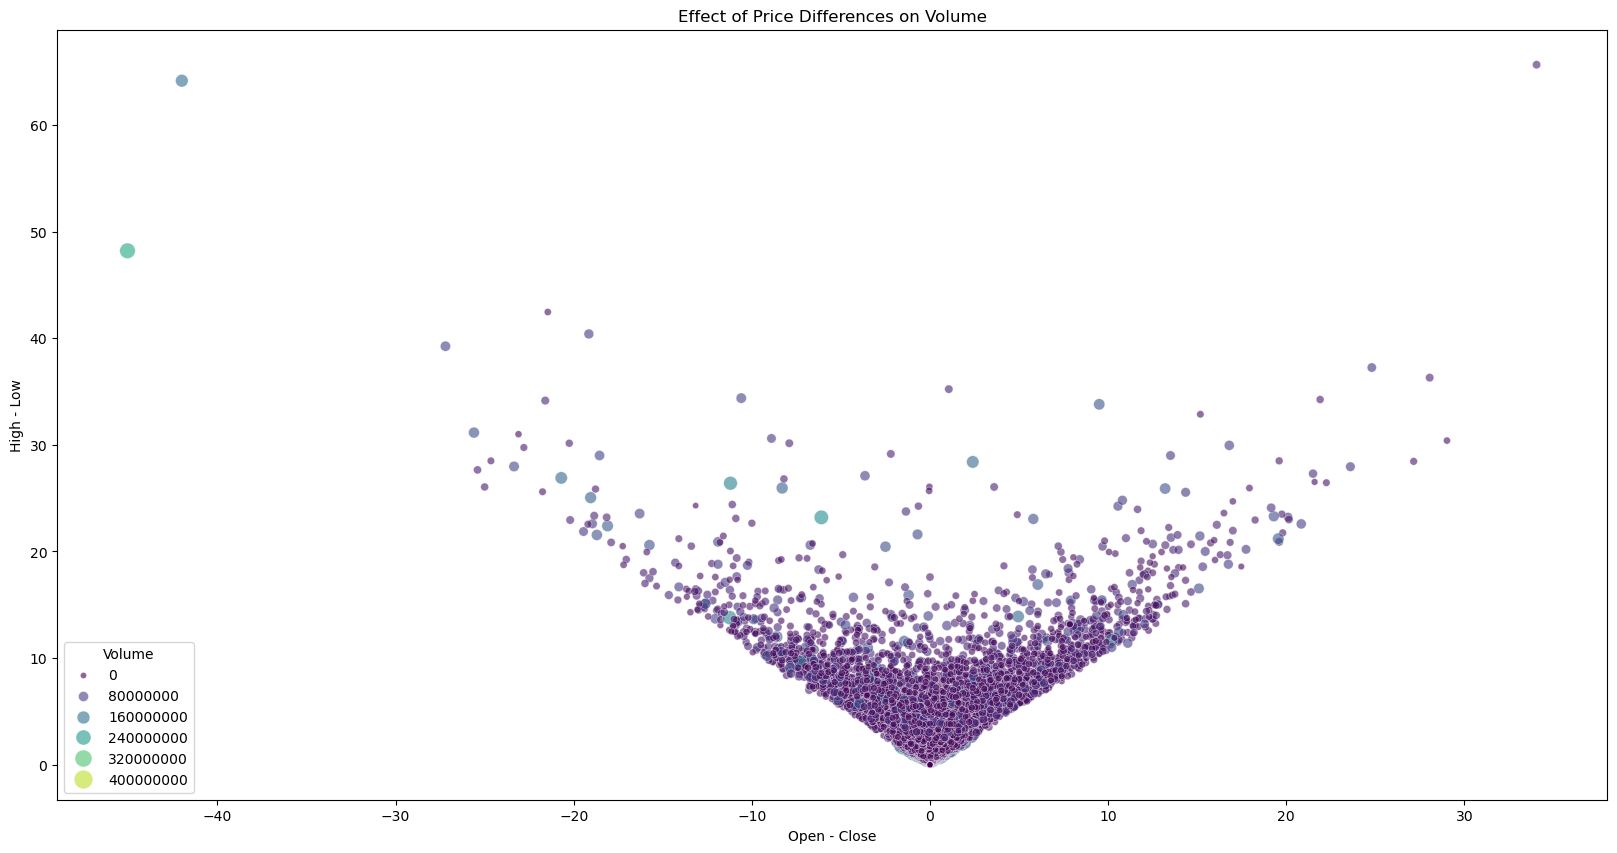

In [75]:
plt.figure(figsize = (20,10))
sns.scatterplot(x=df['Open'] - df['Close'], y=df['High'] - df['Low'], hue=df['Volume'], palette='viridis', size=df['Volume'], sizes=(20, 200), alpha=0.6)
plt.title('Effect of Price Differences on Volume')
plt.xlabel('Open - Close')
plt.ylabel('High - Low')
plt.show()

### This infers for stable or less price difference volume of stock trading is higher



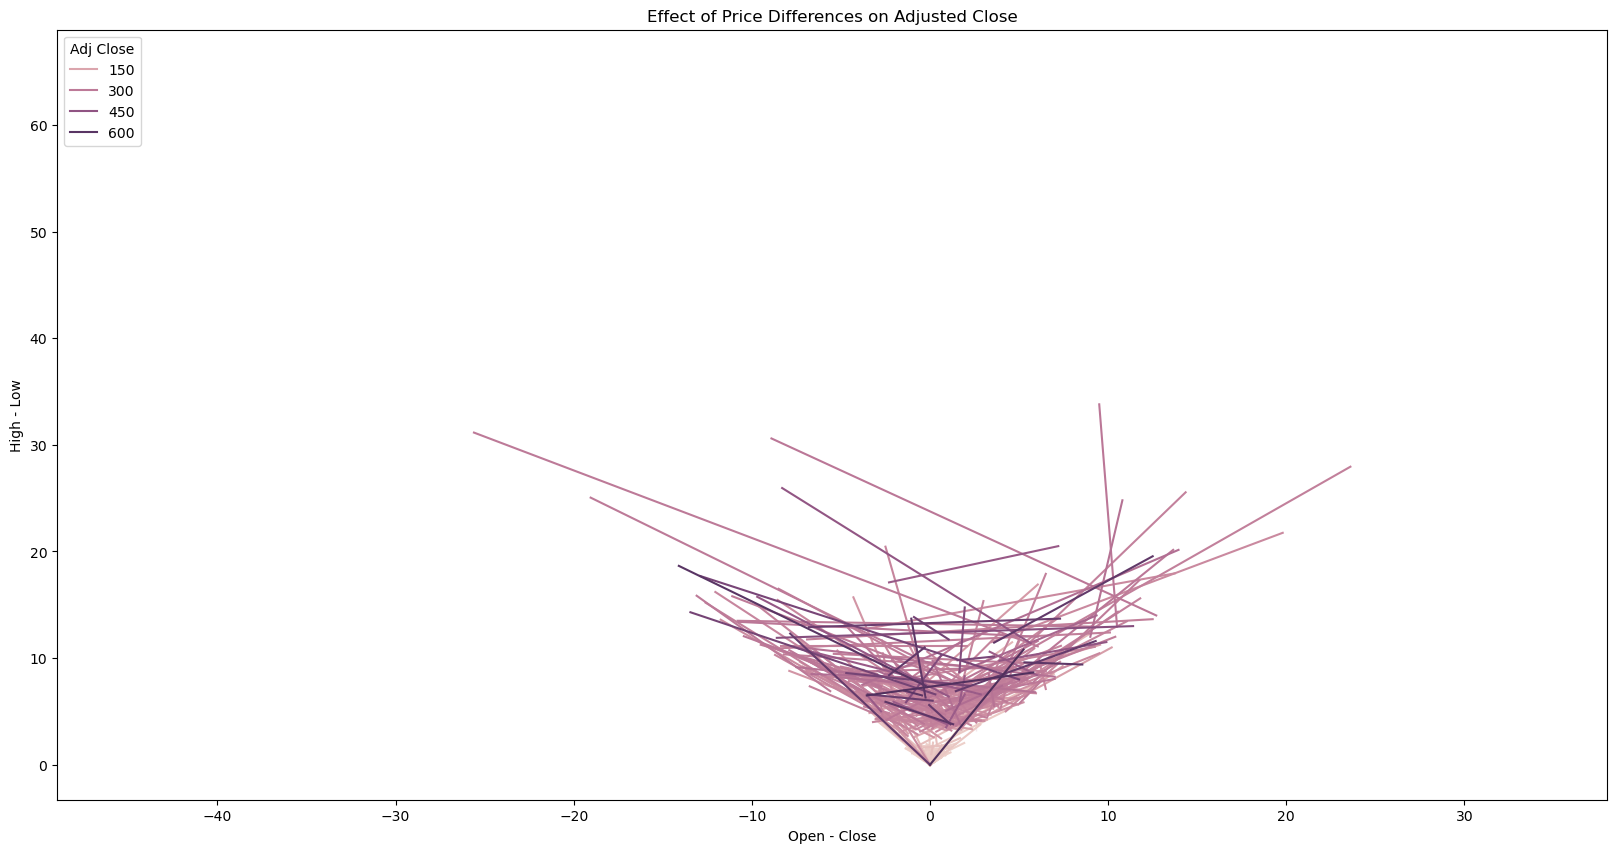

In [88]:
plt.figure(figsize = (20,10))
sns.lineplot(x = df['Open']-df['Close'], y = df['High'] - df['Low'], hue = df['Adj Close'])
plt.title('Effect of Price Differences on Adjusted Close')
plt.xlabel('Open - Close')
plt.ylabel('High - Low')
plt.show()

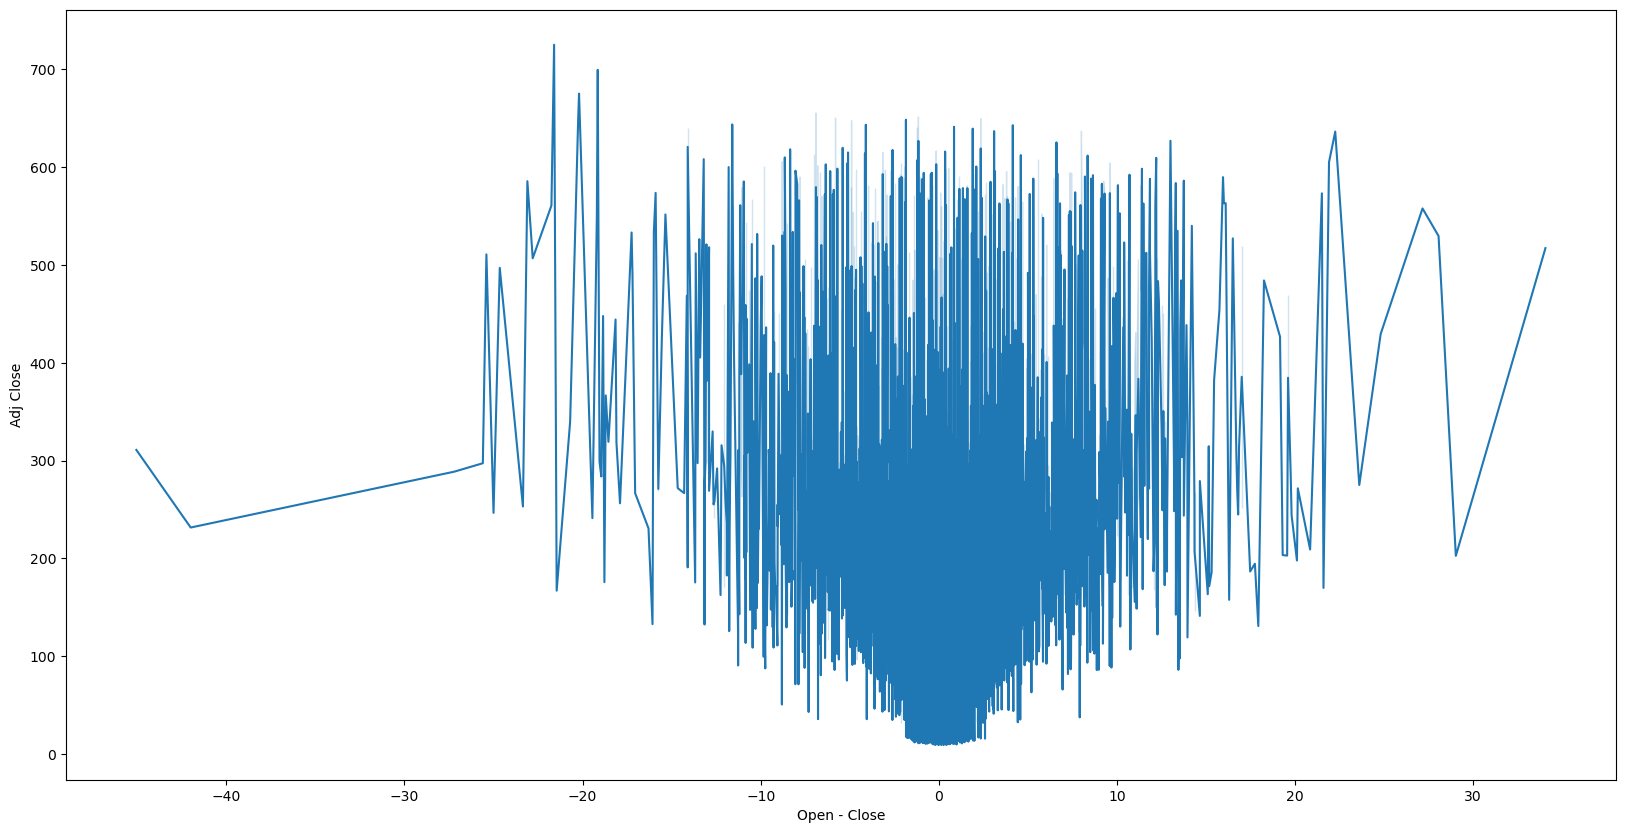

In [89]:
plt.figure(figsize = (20,10))
sns.lineplot(x = df['Open']-df['Close'], y = df['Adj Close'])
plt.xlabel('Open - Close')
plt.show()

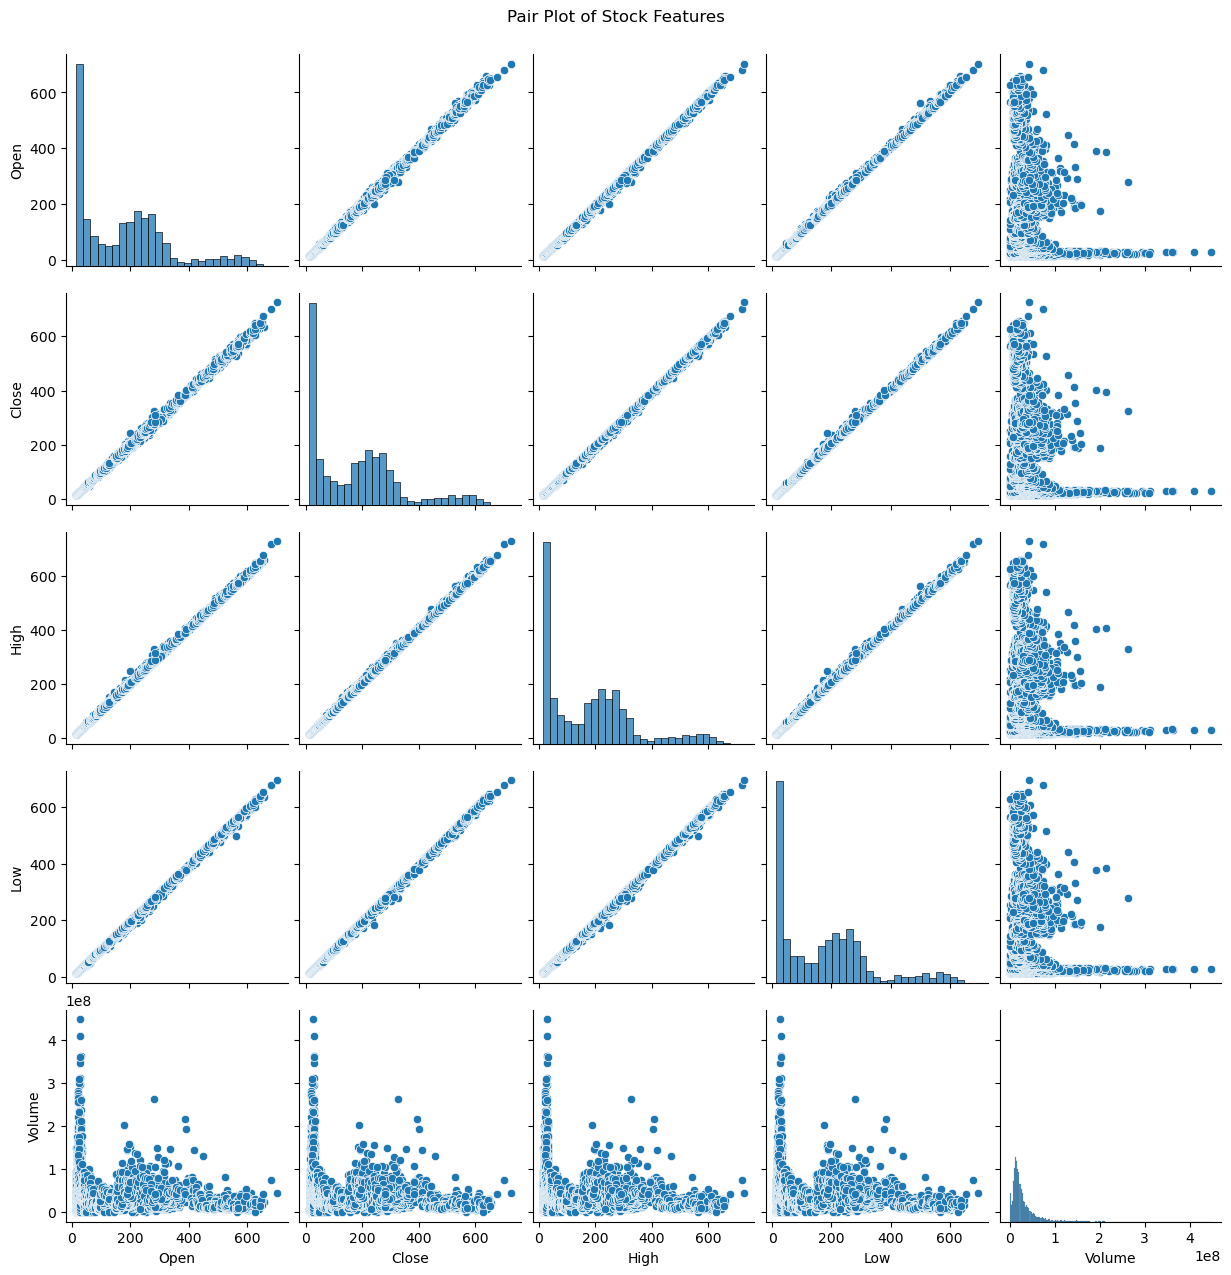

In [92]:
subset = df[['Open', 'Close', 'High', 'Low', 'Volume']]
sns.pairplot(subset)
plt.suptitle('Pair Plot of Stock Features', y=1.02)
plt.show()

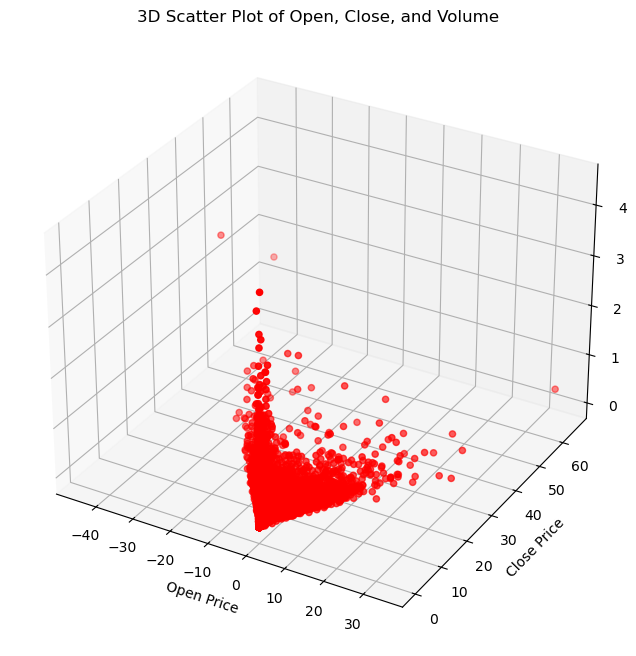

In [94]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Open']- df['Close'], df['High'] - df['Low'],df['Volume'], c='r', marker='o')
ax.set_xlabel('Open Price')
ax.set_ylabel('Close Price')
ax.set_zlabel('Volume')
plt.title('3D Scatter Plot of Open, Close, and Volume')
plt.show()


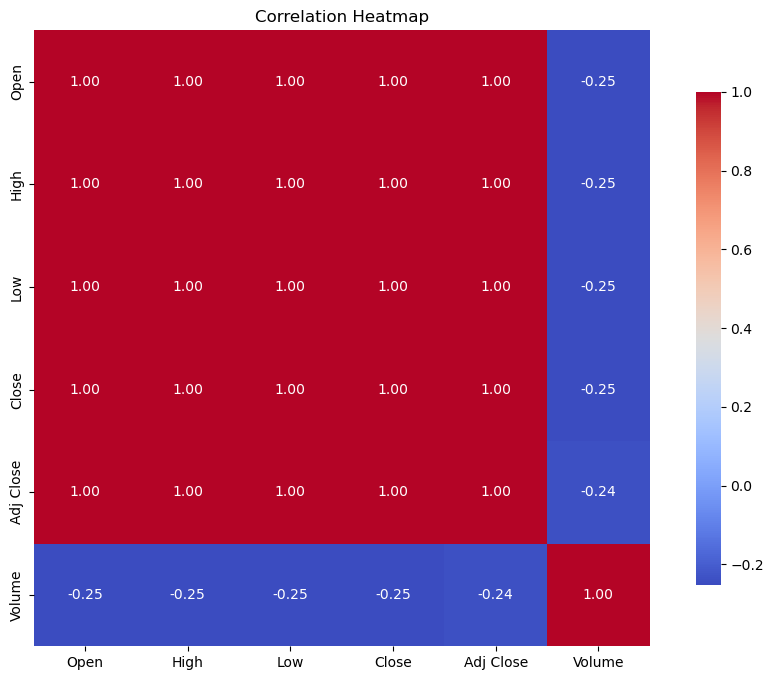

In [98]:
correlation_matrix = df.corr(numeric_only = True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap')
plt.show()
plt.show()

The high correlation between 'Open,' 'High,' 'Low,' 'Close,' and 'Adj Close' shows these features are highly interdependent and tend to move together in the same direction.
The negative correlation of 'Volume' with price-related features suggests that increased trading volume does not necessarily coincide with an increase in stock prices.